[View in Colaboratory](https://colab.research.google.com/github/ami432/INKERS/blob/master/Bharatkumar_Batch3_Assignment4A.ipynb)

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


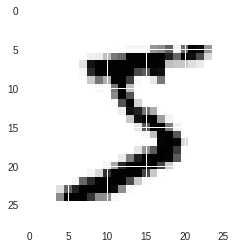

In [27]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [30]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [32]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 5, 5, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Dropout(0.3))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 9))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 10)          330       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 10)          8110      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [36]:
model.fit(X_train, Y_train, batch_size=25, nb_epoch=12, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/12
60000/60000 [==============================] - 32s 527us/step - loss: 0.1626 - acc: 0.9507
Epoch 2/12
23775/60000 [==========>...................] - ETA: 18s - loss: 0.0655 - acc: 0.9799

60000/60000 [==============================] - 31s 524us/step - loss: 0.0593 - acc: 0.9817
Epoch 3/12
38825/60000 [==================>...........] - ETA: 11s - loss: 0.0452 - acc: 0.9857

60000/60000 [==============================] - 31s 523us/step - loss: 0.0444 - acc: 0.9859
Epoch 4/12
46100/60000 [======================>.......] - ETA: 7s - loss: 0.0398 - acc: 0.9875

60000/60000 [==============================] - 31s 522us/step - loss: 0.0389 - acc: 0.9880
Epoch 5/12
49550/60000 [=======================>......] - ETA: 5s - loss: 0.0323 - acc: 0.9899

60000/60000 [==============================] - 31s 520us/step - loss: 0.0319 - acc: 0.9899
Epoch 6/12
50950/60000 [========================>.....] - ETA: 4s - loss: 0.0283 - acc: 0.9909

60000/60000 [==============================] - 31s 521us/step - loss: 0.0282 - acc: 0.9911
Epoch 7/12
51200/60000 [========================>.....] - ETA: 4s - loss: 0.0261 - acc: 0.9914

60000/60000 [==============================] - 31s 524us/step - loss: 0.0261 - acc: 0.9914
Epoch 8/12
52300/60000 [=========================>....] - ETA: 3s - loss: 0.0235 - acc: 0.9927

60000/60000 [==============================] - 31s 519us/step - loss: 0.0230 - acc: 0.9926
Epoch 9/12
52850/60000 [=========================>....] - ETA: 3s - loss: 0.0208 - acc: 0.9929

60000/60000 [==============================] - 31s 520us/step - loss: 0.0213 - acc: 0.9928
Epoch 10/12
51925/60000 [========================>.....] - ETA: 4s - loss: 0.0203 - acc: 0.9934

60000/60000 [==============================] - 31s 521us/step - loss: 0.0205 - acc: 0.9934
Epoch 11/12
51825/60000 [========================>.....] - ETA: 4s - loss: 0.0190 - acc: 0.9939

60000/60000 [==============================] - 31s 520us/step - loss: 0.0195 - acc: 0.9937
Epoch 12/12
52250/60000 [=========================>....] - ETA: 4s - loss: 0.0173 - acc: 0.9942

60000/60000 [==============================] - 31s 520us/step - loss: 0.0169 - acc: 0.9944


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [38]:
print(score)

[0.0246418344722013, 0.9926]


In [0]:
y_pred = model.predict(X_test)

In [40]:
print(y_pred[:9])
print(y_test[:9])

[[6.8807383e-15 1.1008093e-16 1.6407294e-09 1.8455596e-07 5.7226100e-18
  3.3208581e-12 6.5577883e-22 9.9999976e-01 1.0828236e-12 5.2069599e-10]
 [3.5789715e-12 5.5676445e-08 1.0000000e+00 5.9958646e-13 3.1200689e-16
  1.6944737e-19 5.2007876e-10 3.6062639e-16 3.0523858e-10 7.6819759e-20]
 [1.6853756e-11 9.9999857e-01 2.6614387e-08 5.8417897e-09 4.5301468e-07
  3.6635114e-08 3.0006901e-09 4.9710292e-07 5.1479037e-07 3.8775720e-09]
 [9.9999726e-01 7.4616572e-16 6.6757697e-11 1.1750233e-12 2.0116854e-13
  1.3808579e-12 2.7972847e-06 2.2858525e-12 6.9106204e-10 6.9587167e-09]
 [3.2817017e-15 4.8153481e-14 2.0725068e-09 7.6634976e-15 1.0000000e+00
  3.8427015e-16 1.5391753e-13 3.5259136e-11 1.4203672e-12 5.2826703e-09]
 [1.0982441e-12 9.9999547e-01 2.8042564e-08 2.6420713e-10 4.4047127e-07
  3.4955372e-11 2.0148616e-09 3.9541942e-06 6.7776504e-08 5.5239340e-08]
 [1.9765410e-18 6.8727810e-09 1.2881746e-08 2.8164371e-14 9.9999166e-01
  1.8232456e-10 7.4897093e-15 4.5316251e-12 4.5201145e-06 